# Assignment 1
## Downloading Gaia data
This notebook is a simple example of downloading Gaia data, loading it in, and doing simple plots of it.

In [1]:
!curl -OJ https://girder.hub.yt/api/v1/file/57fcf27bb8805f000164ab40/download
# Windows 10

curl: Saved to filename 'gaia_validp.h5'


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 93.8M    0  164k    0     0   402k      0  0:03:58 --:--:--  0:03:58  402k
  3 93.8M    3 3344k    0     0  2376k      0  0:00:40  0:00:01  0:00:39 2376k
  6 93.8M    6 6280k    0     0  2609k      0  0:00:36  0:00:02  0:00:34 2609k
  9 93.8M    9 9120k    0     0  2676k      0  0:00:35  0:00:03  0:00:32 2676k
 12 93.8M   12 11.7M    0     0  2732k      0  0:00:35  0:00:04  0:00:31 2732k
 15 93.8M   15 14.7M    0     0  2797k      0  0:00:34  0:00:05  0:00:29 2992k
 18 93.8M   18 17.7M    0     0  2841k      0  0:00:33  0:00:06  0:00:27 2972k
 22 93.8M   22 21.0M    0     0  2914k      0  0:00:32  0:00:07  0:00:25 3060k
 25 93.8M   25 24.2M    0     0  2949k      0  0:00:32  0:00:08  0:00:24 3136k
 28 93.8M   28 27.2M    0     0  2961k      0  0:00

In [2]:
%matplotlib inline

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = {}
with h5py.File("gaia_validp.h5") as f:
    for k in f:
        data[k] = f[k][:]

In [5]:
print(data.keys())

dict_keys(['phot_g_mean_mag', 'pmdec', 'parallax', 'dec', 'ra', 'pmra'])


In [6]:
type(data)

dict

In [7]:
data

{'dec': array([ 0.23539165,  0.20006769,  0.24882544, ..., -0.34317732,
        -0.2281136 , -0.22130082]),
 'parallax': array([ 6.35295075,  3.90032894,  3.15531322, ...,  6.03693811,
         1.48414231,  2.68011134]),
 'phot_g_mean_mag': array([  7.99137783,  10.58095872,  10.74310238, ...,   9.23885216,
          9.01706935,   9.73257118]),
 'pmdec': array([ -7.64198999, -55.10917286,  -1.6028671 , ..., -27.85234475,
          1.84710791,   3.15173424]),
 'pmra': array([ 43.75231342,  10.036263  ,   2.93228368, ...,  15.71355591,
         11.35288892,   2.89787878]),
 'ra': array([  45.03433035,   45.16500677,   45.08615484, ...,  315.28287959,
         314.74064816,  314.9607306 ])}

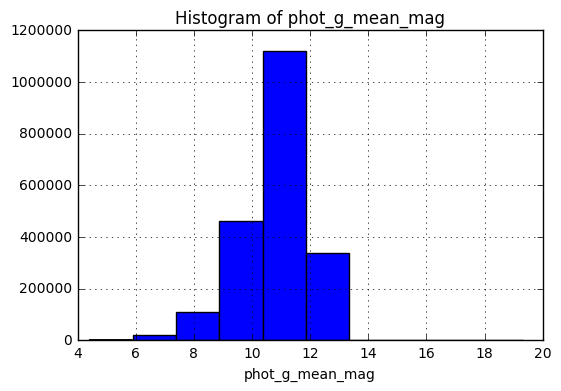

In [8]:
# Plot a histogram of phot_g_mean_mag to show its distribution
plt.hist(data['phot_g_mean_mag'])
plt.title('Histogram of phot_g_mean_mag')
plt.xlabel('phot_g_mean_mag')
plt.grid(True)
plt.show()

In [9]:
data['pmra'].size

2057050

In [10]:
data['ra'].size

2057050

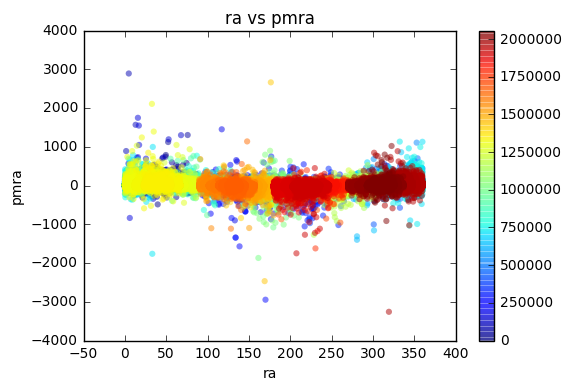

In [11]:
# Plot a scatter plot of ra and pmra to show their relationship
plt.scatter(data['ra'],data['pmra'],alpha=0.5,c=np.arange(data['ra'].size),edgecolors='none')
# The color bar is generated according to the index of data.
plt.colorbar()
plt.xlabel('ra')
plt.ylabel('pmra')
plt.title('ra vs pmra')
plt.show()

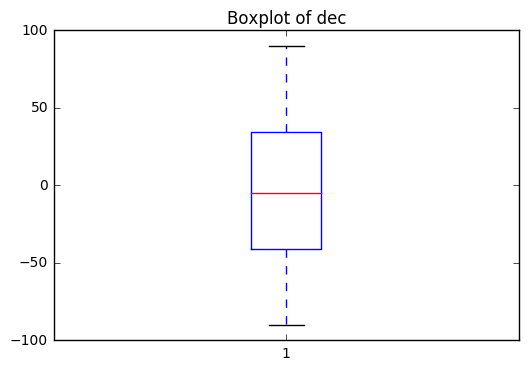

In [12]:
# Plot a boxplot of dec
plt.boxplot(data['dec'])
plt.title('Boxplot of dec')
plt.show()